In [40]:
import matplotlib.pyplot as plt
import numpy as np
import yaml

In [44]:
def moving_average(data, window=3):
    return np.convolve(data, np.ones(window), mode="same") / window

### Separate look at each run

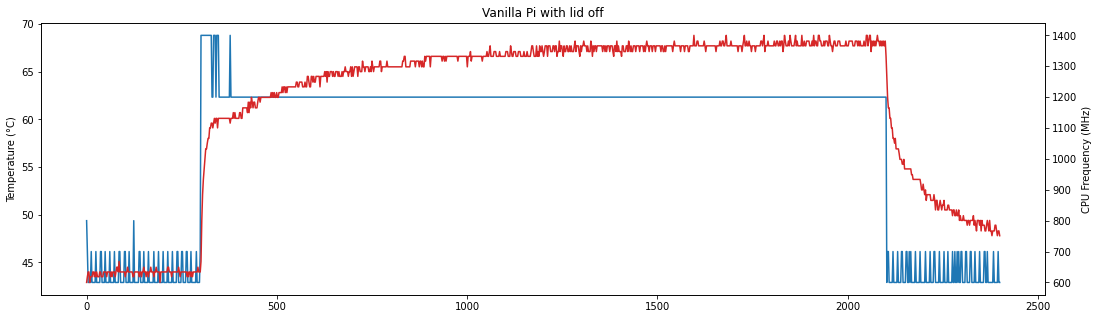

In [31]:
with open("stress_lid_off_long.yaml", "r") as f:
    lid_off = yaml.safe_load(f)

plt.figure(figsize=(18,5))
plt.title("Vanilla Pi with lid off")
plt.plot(lid_off["time"], lid_off["temperature"], c="tab:red", label="Temperature")
plt.ylabel("Temperature (°C)")
ax1 = plt.gca()
ax2 = plt.twinx()
ax2.plot(lid_off["time"], lid_off["cpu frequency"], c="tab:blue", label="CPU Frequency")
ax2.set_ylabel("CPU Frequency (MHz)")
plt.xlabel("Time (s)")
ax1.set_zorder(ax2.get_zorder() + 1)  # put ax1 plot in front of ax2
ax1.patch.set_visible(False)  # hide the 'canvas'
plt.show()

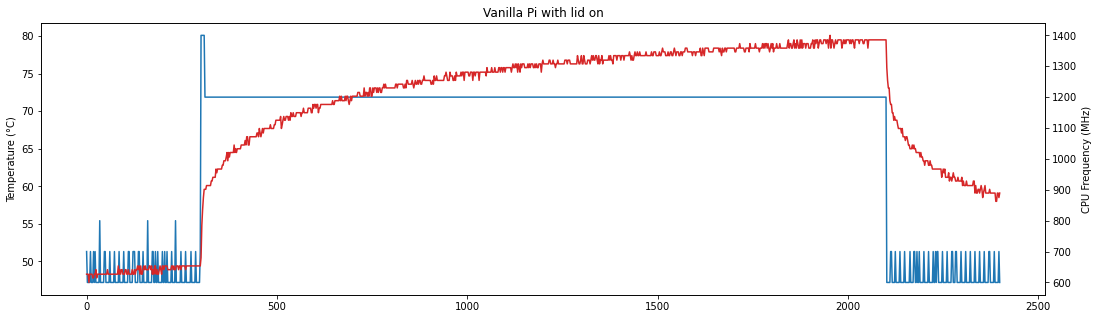

In [32]:
with open("stress_lid_on_long.yaml", "r") as f:
    lid_on = yaml.safe_load(f)

plt.figure(figsize=(18,5))
plt.title("Vanilla Pi with lid on")
plt.plot(lid_on["time"], lid_on["temperature"], c="tab:red", label="Temperature")
plt.ylabel("Temperature (°C)")
ax1 = plt.gca()
ax2 = plt.twinx()
ax2.plot(lid_on["time"], lid_on["cpu frequency"], c="tab:blue", label="CPU Frequency")
ax2.set_ylabel("CPU Frequency (MHz)")
plt.xlabel("Time (s)")
ax1.set_zorder(ax2.get_zorder() + 1)  # put ax1 plot in front of ax2
ax1.patch.set_visible(False)  # hide the 'canvas'
plt.show()

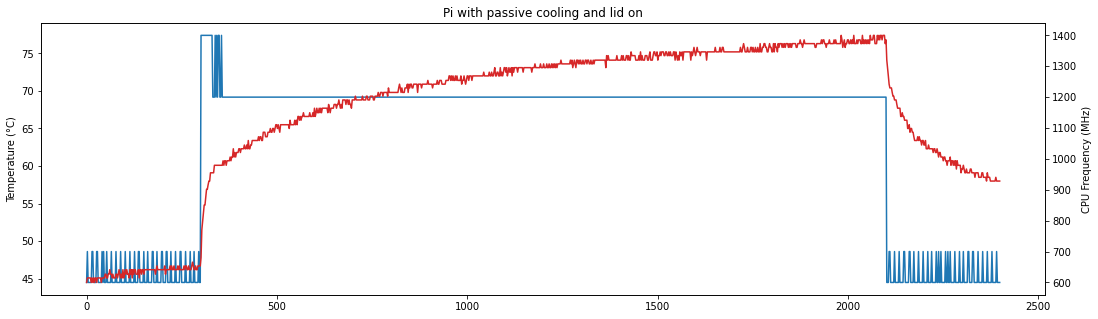

In [50]:
with open("stress_passive_long.yaml", "r") as f:
    passive = yaml.safe_load(f)

plt.figure(figsize=(18,5))
plt.title("Pi with passive cooling and lid on")
plt.plot(passive["time"], passive["temperature"], c="tab:red", label="Temperature")
plt.ylabel("Temperature (°C)")
ax1 = plt.gca()
ax2 = plt.twinx()
ax2.plot(passive["time"], passive["cpu frequency"], c="tab:blue", label="CPU Frequency")
ax2.set_ylabel("CPU Frequency (MHz)")
plt.xlabel("Time (s)")
ax1.set_zorder(ax2.get_zorder() + 1)  # put ax1 plot in front of ax2
ax1.patch.set_visible(False)  # hide the 'canvas'
plt.show()

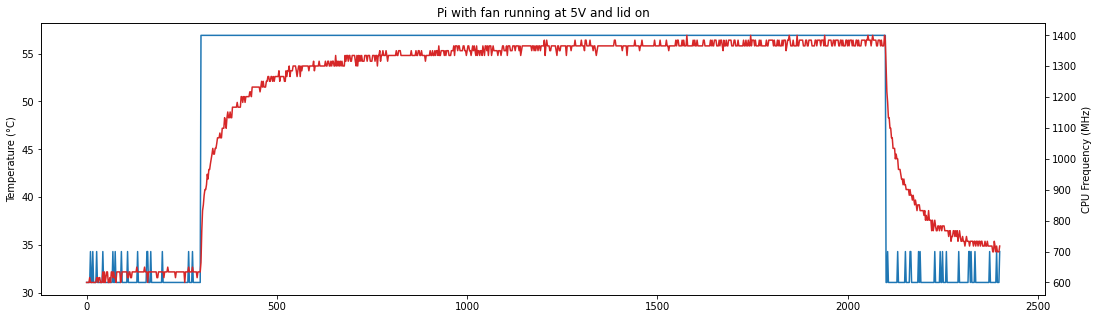

In [60]:
with open("stress_active_long.yaml", "r") as f:
    active_5v = yaml.safe_load(f)

plt.figure(figsize=(18,5))
plt.title("Pi with fan running at 5V and lid on")
plt.plot(active_5v["time"], active_5v["temperature"], c="tab:red", label="Temperature")
plt.ylabel("Temperature (°C)")
ax1 = plt.gca()
ax2 = plt.twinx()
ax2.plot(active_5v["time"], active_5v["cpu frequency"], c="tab:blue", label="CPU Frequency")
ax2.set_ylabel("CPU Frequency (MHz)")
plt.xlabel("Time (s)")
ax1.set_zorder(ax2.get_zorder() + 1)  # put ax1 plot in front of ax2
ax1.patch.set_visible(False)  # hide the 'canvas'
plt.show()

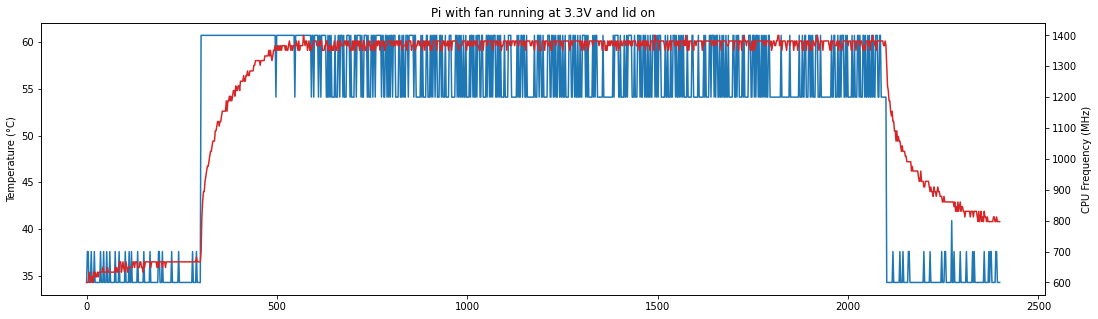

In [65]:
with open("stress_active33v_long.yaml", "r") as f:
    active_3v = yaml.safe_load(f)

plt.figure(figsize=(18,5))
plt.title("Pi with fan running at 3.3V and lid on")
plt.plot(active_3v["time"], active_3v["temperature"], c="tab:red", label="Temperature")
plt.ylabel("Temperature (°C)")
ax1 = plt.gca()
ax2 = plt.twinx()
ax2.plot(active_3v["time"], active_3v["cpu frequency"], c="tab:blue", label="CPU Frequency")
ax2.set_ylabel("CPU Frequency (MHz)")
plt.xlabel("Time (s)")
ax1.set_zorder(ax2.get_zorder() + 1)  # put ax1 plot in front of ax2
ax1.patch.set_visible(False)  # hide the 'canvas'
plt.show()

### Comparison of runs

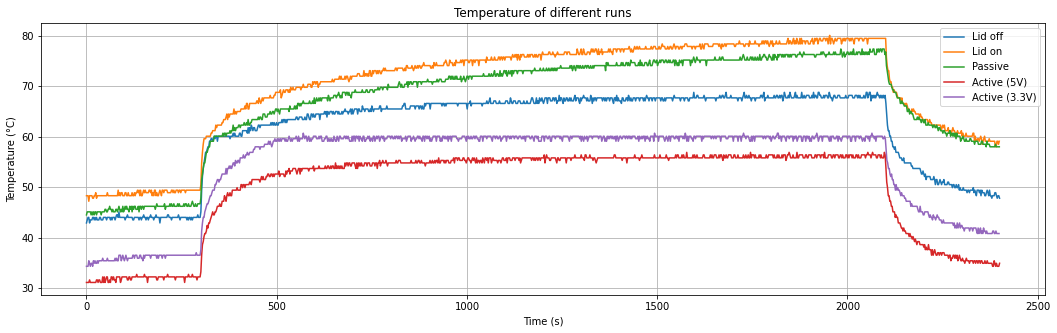

In [68]:
plt.figure(figsize=(18,5))
plt.title("Temperature of different runs")
plt.plot(lid_off["time"], lid_off["temperature"], label="Lid off")
plt.plot(lid_on["time"], lid_on["temperature"], label="Lid on")
plt.plot(passive["time"], passive["temperature"], label="Passive")
plt.plot(active_5v["time"], active_5v["temperature"], label="Active (5V)")
plt.plot(active_3v["time"], active_3v["temperature"], label="Active (3.3V)")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.legend()
plt.show()

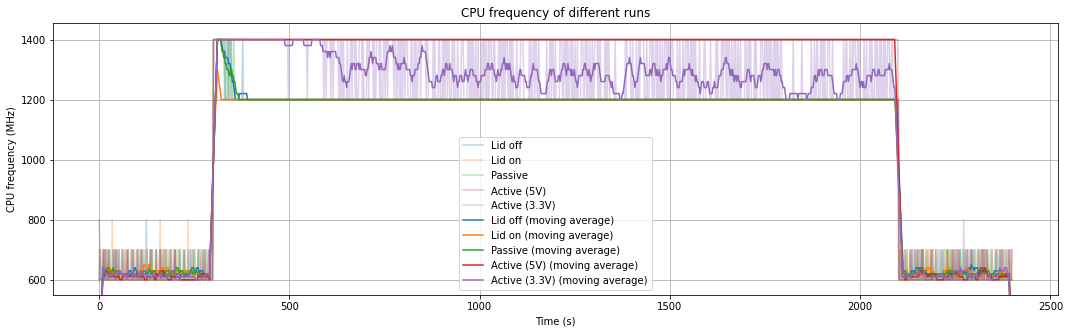

In [63]:
plt.figure(figsize=(18,5))
plt.title("CPU frequency of different runs")
plt.plot(lid_off["time"], lid_off["cpu frequency"], c="tab:blue", alpha=0.3, label="Lid off")
plt.plot(lid_on["time"], lid_on["cpu frequency"], c="tab:orange", alpha=0.3, label="Lid on")
plt.plot(passive["time"], passive["cpu frequency"], c="tab:green", alpha=0.3, label="Passive")
plt.plot(active_5v["time"], active_5v["cpu frequency"], c="tab:red", alpha=0.3, label="Active (5V)")
plt.plot(active_3v["time"], active_3v["cpu frequency"], c="tab:purple", alpha=0.3, label="Active (3.3V)")
plt.plot(lid_off["time"], moving_average(lid_off["cpu frequency"],window=10), label="Lid off (moving average)")
plt.plot(lid_on["time"], moving_average(lid_on["cpu frequency"],window=10), label="Lid on (moving average)")
plt.plot(passive["time"], moving_average(passive["cpu frequency"],window=10), label="Passive (moving average)")
plt.plot(active_5v["time"], moving_average(active_5v["cpu frequency"],window=10), label="Active (5V) (moving average)")
plt.plot(active_3v["time"], moving_average(active_3v["cpu frequency"],window=10), label="Active (3.3V) (moving average)")
plt.xlabel("Time (s)")
plt.ylabel("CPU frequency (MHz)")
plt.ylim(550, None)
plt.grid()
plt.legend()
plt.show()